Задача 4. Сравнение методов классификации

Левков Данил Андреевич (22.М05)

Выполнил задачи:
- Найти данные размера хотя бы 10000, на которых можно решить задачу классификации или регрессии.
- Выполнить разведочный анализ (EDA). При необходимости выполнить полезные преобразования данных.
- Самостоятельно реализуйте алгоритмы Bagging и AdaBoost, которые позволят обучить ансамбли каких-то простых моделей, например деревьев принятия решений.
- Обучите ансамбли для каких-то простых моделей, используя свои две реализации, а также реализации из sklearn (Bagging, Random Forest, AdaBoost, Gradient Tree Boosting, Histogram-Based Gradient Boosting).
- При обучении использовать подбор гиперпараметров, кросс-валидацию.
- Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества, построить матрицы ошибок.
- * (+2 балла) Также добавить в сравнение модели из библиотек XGBoost, LightGBM и CatBoost.
- * (+3 балла) Для подбора гиперпараметров использовать фреймворк Optuna.

* Найти данные размера хотя бы 10000, на которых можно решить задачу классификации или регрессии.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Выполнить разведочный анализ (EDA). При необходимости выполнить полезные преобразования данных.

In [2]:
df = pd.read_excel('data/Dry_Bean_Dataset.xlsx')

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
len(df)

13611

Описание датасета:

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira) - target

Назначим каждому классу свой номер для удобства обработки

In [5]:
df['Class'] = pd.factorize(df.Class)[0]

In [6]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,3.631181
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,2.151782
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,0.000000
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,2.000000
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,4.000000
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,6.000000
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,6.000000


Проверка на наличие выбросов

In [7]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Чистка данных не трубуется

In [8]:
df['Class'].value_counts()

6    3546
5    2636
0    2027
4    1928
3    1630
1    1322
2     522
Name: Class, dtype: int64

Второй класс представлен в меньшем количестве, чем остальные, но разница не на столько критична, чтобы убирать его из рассмотрения

In [9]:
df.groupby('Class').mean()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Class,,,,,,,,,,,,,,,,
0,39881.299951,727.672440,251.291957,201.909653,1.245182,0.584781,40269.567341,224.948441,0.771674,0.990351,0.944508,0.896841,0.006334,0.002541,0.805149,0.998383
1,69804.133132,1046.105764,370.044279,240.309352,1.544395,0.754665,71025.729198,297.311018,0.749273,0.982804,0.800200,0.805001,0.005357,0.001394,0.649144,0.995739
2,173485.059387,1585.619079,593.152075,374.352547,1.585550,0.770518,175813.116858,468.941426,0.776559,0.986902,0.864421,0.792622,0.003442,0.000844,0.629195,0.991841
3,75538.211043,1057.634282,409.499538,236.370616,1.733663,0.814804,76688.503067,309.535280,0.758953,0.985021,0.845934,0.756703,0.005459,0.001107,0.573022,0.990584
4,53648.508817,919.859676,372.570290,184.170663,2.026119,0.867443,54440.091805,260.730715,0.706393,0.985480,0.794420,0.700880,0.007007,0.001048,0.491791,0.991926
5,44729.128604,796.418737,299.380258,190.800250,1.570083,0.767277,45273.099772,238.335316,0.749445,0.987971,0.884652,0.797345,0.006720,0.001683,0.636358,0.995385
6,32118.710942,665.209536,246.557279,165.657143,1.490471,0.736632,32498.435138,201.683813,0.752953,0.988226,0.908114,0.819110,0.007755,0.002161,0.671636,0.996914


Заметим следующие особенности:
* для 2 класса практически все площадные показатели намного выше, чем у остальных.
* атрибуты ConvexArea и EquivDiameter хорошо разделяют данные
* в то время как атрибуты Extent и roundness слабо отличаются для разных классов

Теперь рассмотрим признаки по отдельности

<AxesSubplot: title={'center': 'Area'}, xlabel='Class'>

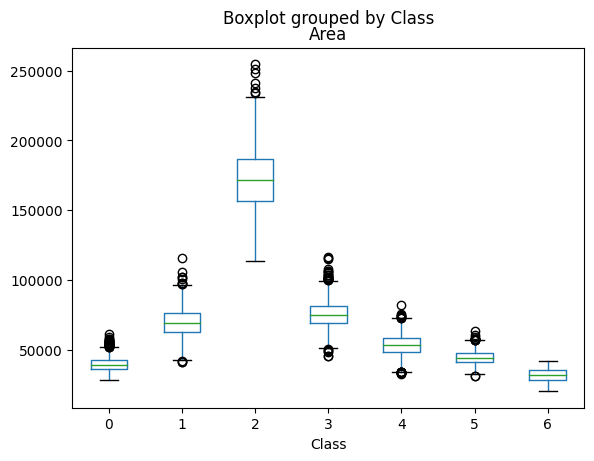

In [10]:
df.boxplot(by ='Class', column =['Area'], grid = False)

<AxesSubplot: title={'center': 'Perimeter'}, xlabel='Class'>

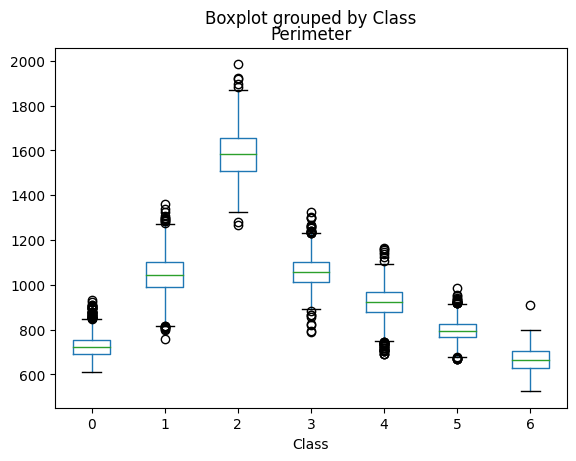

In [11]:
df.boxplot(by ='Class', column =['Perimeter'], grid = False)

<AxesSubplot: title={'center': 'MajorAxisLength'}, xlabel='Class'>

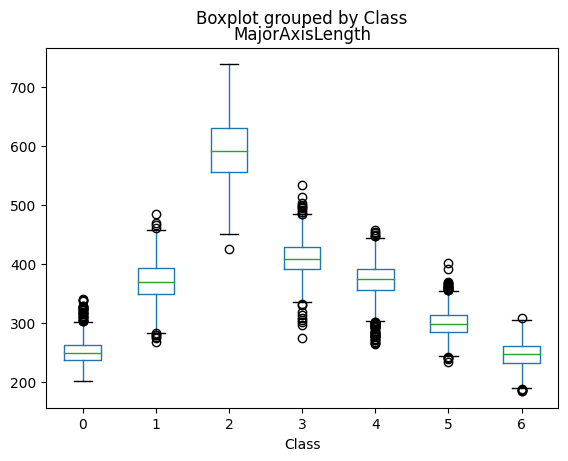

In [12]:
df.boxplot(by ='Class', column =['MajorAxisLength'], grid = False)

<AxesSubplot: title={'center': 'MinorAxisLength'}, xlabel='Class'>

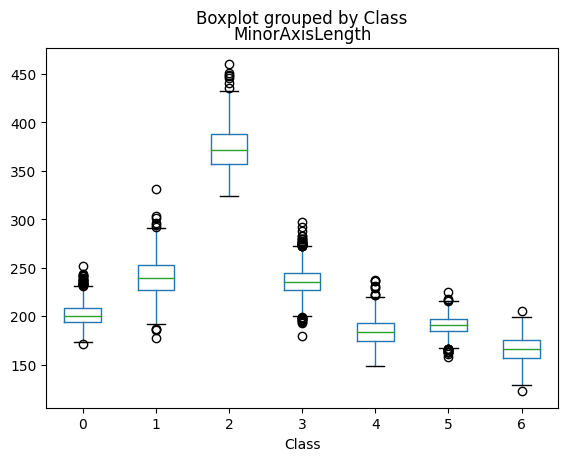

In [13]:
df.boxplot(by ='Class', column =['MinorAxisLength'], grid = False)

<AxesSubplot: title={'center': 'ConvexArea'}, xlabel='Class'>

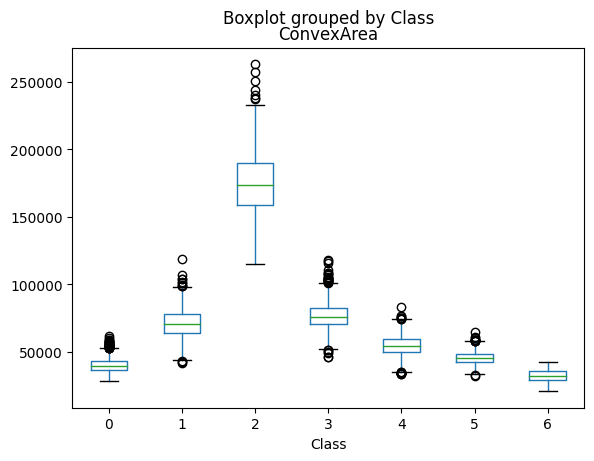

In [14]:
df.boxplot(by ='Class', column =['ConvexArea'], grid = False)

<AxesSubplot: title={'center': 'EquivDiameter'}, xlabel='Class'>

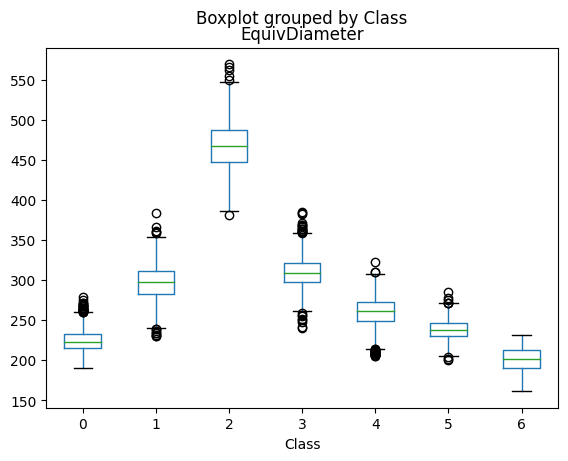

In [15]:
df.boxplot(by ='Class', column =['EquivDiameter'], grid = False)

Видим, что все предыдущие признаки очень похожи друг на друга и по большей части взаимозаменяемы

<AxesSubplot: title={'center': 'AspectRation'}, xlabel='Class'>

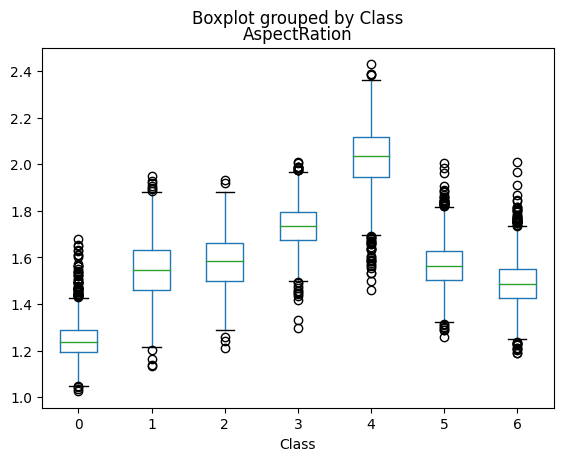

In [16]:
df.boxplot(by ='Class', column =['AspectRation'], grid = False)

<AxesSubplot: title={'center': 'Eccentricity'}, xlabel='Class'>

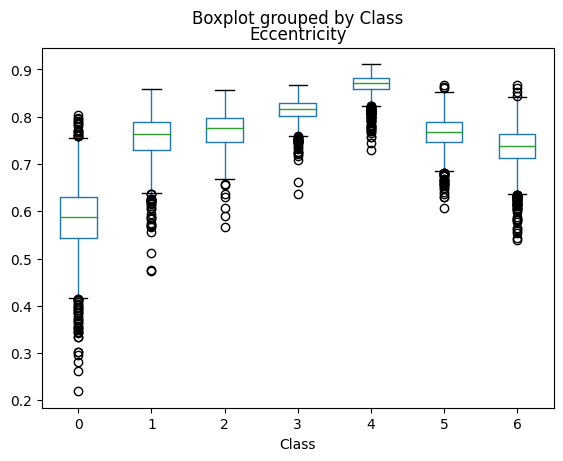

In [17]:
df.boxplot(by ='Class', column =['Eccentricity'], grid = False)

<AxesSubplot: title={'center': 'Extent'}, xlabel='Class'>

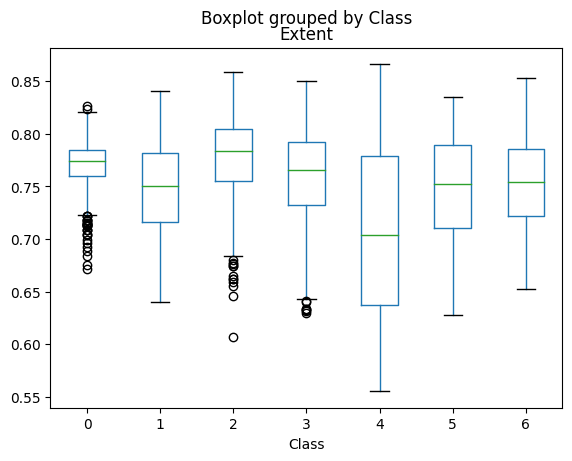

In [18]:
df.boxplot(by ='Class', column =['Extent'], grid = False)

Признак Extent очень сильно зашумлен, данные имеют большой разброс и находятся примерно в одном интервале

<AxesSubplot: title={'center': 'Solidity'}, xlabel='Class'>

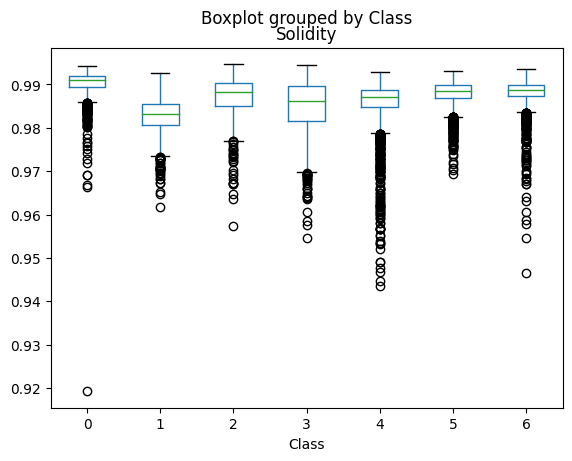

In [19]:
df.boxplot(by ='Class', column =['Solidity'], grid = False)

<AxesSubplot: title={'center': 'roundness'}, xlabel='Class'>

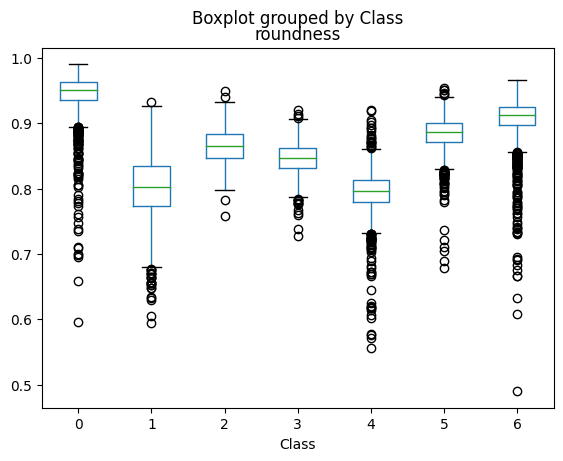

In [20]:
df.boxplot(by ='Class', column =['roundness'], grid = False)

<AxesSubplot: title={'center': 'Compactness'}, xlabel='Class'>

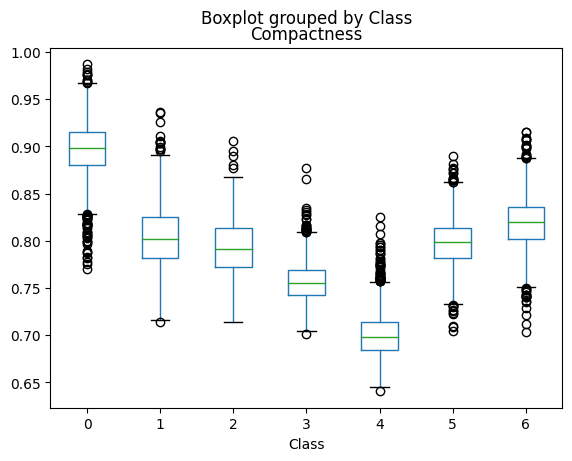

In [21]:
df.boxplot(by ='Class', column =['Compactness'], grid = False)

array([<AxesSubplot: title={'center': 'ShapeFactor1'}, xlabel='Class'>,
       <AxesSubplot: title={'center': 'ShapeFactor2'}, xlabel='Class'>],
      dtype=object)

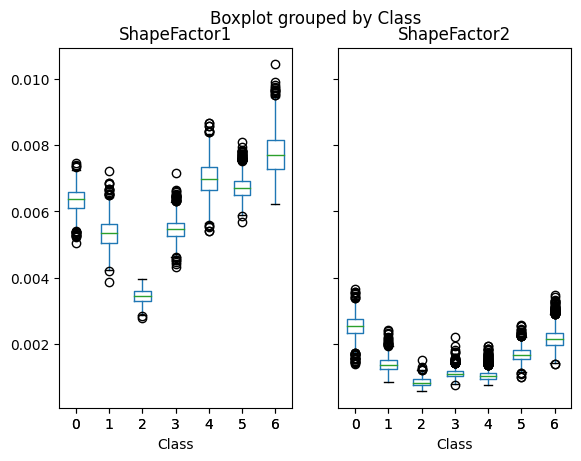

In [22]:
df.boxplot(by ='Class', column =['ShapeFactor1', 'ShapeFactor2'], grid = False)

<AxesSubplot: title={'center': 'ShapeFactor3'}, xlabel='Class'>

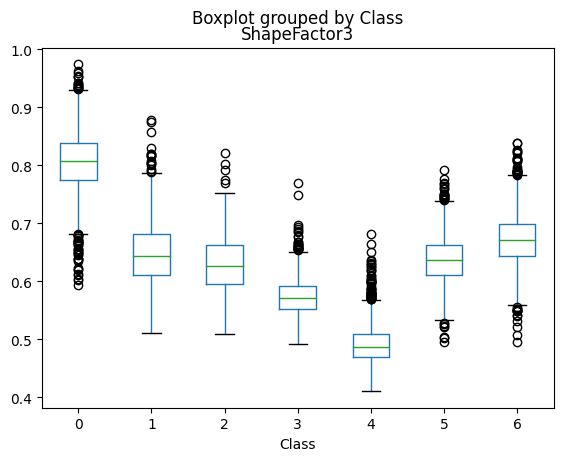

In [23]:
df.boxplot(by ='Class', column =['ShapeFactor3'], grid = False)

<AxesSubplot: title={'center': 'ShapeFactor4'}, xlabel='Class'>

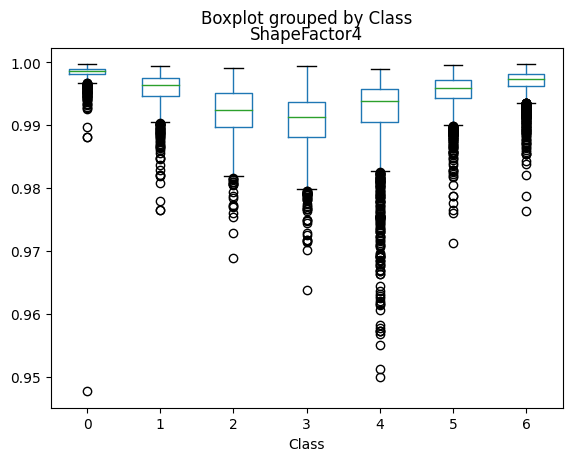

In [24]:
df.boxplot(by ='Class', column =['ShapeFactor4'], grid = False)

ShapeFactor4 так же сильно зашумлен, как и Extent

<AxesSubplot: >

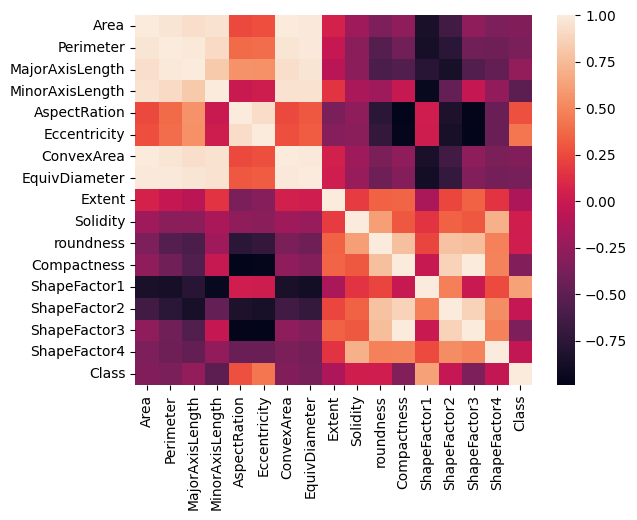

In [25]:
sns.heatmap(df.corr())

Уберем наименее полезные признаки

In [26]:
df = df.drop(columns=['Area', 'Perimeter', 'MinorAxisLength', 'ShapeFactor1', 'Extent'])

* Самостоятельно реализуйте алгоритмы Bagging и AdaBoost, которые позволят обучить ансамбли каких-то простых моделей, например деревьев принятия решений.

In [27]:
from functions import BaggingCalculator, AdaBoostCalculator

In [28]:
from sklearn.model_selection import train_test_split

x = df.drop('Class', axis = 1).values
y = df['Class'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 19)

In [29]:
from prettytable import PrettyTable

results = PrettyTable(["Model", "Accuracy", "MSE", "R^2", "Time", "Params"])

Для подбора гиперпараметров использовать фреймворк Optuna.

In [30]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
import time
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

C:\Users\stude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
y_list = {}
def objective(trial):
    bag_num = trial.suggest_int('Bags number', 1, 30)
    bag_size = trial.suggest_int('Samples in bag', 1, 30)
    
    model = BaggingCalculator(bag_num, bag_size)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scrore = accuracy_score(y_test, y_pred)
    accur = np.around(scrore * 1000, decimals=-1)
    y_list[accur] = y_pred
    return scrore

optimazer = optuna.create_study(direction='maximize')
start = time.time()
optimazer.optimize(objective, n_trials = 25)
end = time.time()

y_BaggingCalculator = y_list[max(y_list.keys())]

results.add_row(["My BaggingCalculator", \
                optimazer.best_value, \
                mean_squared_error(y_test, y_BaggingCalculator), \
                r2_score(y_test, y_BaggingCalculator), \
                end - start, \
                optimazer.best_trial.params])


In [32]:
y_list = {}
def objective(trial):
    bag_num = trial.suggest_int('Bags number', 1, 30)
    learning_koeff = trial.suggest_float('Learning rate', 0.1, 1.0, step=0.1)
    
    model = AdaBoostCalculator(bag_num, learning_koeff)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scrore = accuracy_score(y_test, y_pred)
    accur = np.around(scrore * 1000, decimals=-1)
    y_list[accur] = y_pred
    return scrore

optimazer = optuna.create_study(direction='maximize')
start = time.time()
optimazer.optimize(objective, n_trials = 25)
end = time.time()

y_AdaBoostCalculator = y_list[max(y_list.keys())]

results.add_row(["My AdaBoostCalculator", \
                optimazer.best_value, \
                mean_squared_error(y_test, y_AdaBoostCalculator), \
                r2_score(y_test, y_AdaBoostCalculator), \
                end - start, \
                optimazer.best_trial.params])


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
from sklearn.ensemble import BaggingClassifier
y_list = {}

def objective(trial):
    bag_num = trial.suggest_int('Bags number', 1, 30)
    bag_size = trial.suggest_int('Samples in bag', 2, 8)
    features_num = trial.suggest_float('Features number', 0.5, 1.0)
    model = BaggingClassifier(
        n_estimators = bag_num,
        max_samples = bag_size,
        max_features = features_num,
        base_estimator = DecisionTreeClassifier())
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scrore = accuracy_score(y_test, y_pred)
    accur = np.around(scrore * 1000, decimals=-1)
    y_list[accur] = y_pred
    return scrore

optimazer = optuna.create_study(direction='maximize')
start = time.time()
optimazer.optimize(objective, n_trials = 25)
end = time.time()

y_BaggingClassifier = y_list[max(y_list.keys())]

results.add_row(["sklearn BaggingClassifier", \
                optimazer.best_value, \
                mean_squared_error(y_test, y_BaggingClassifier), \
                r2_score(y_test, y_BaggingClassifier), \
                end - start, \
                optimazer.best_trial.params])

In [36]:
from sklearn.ensemble import AdaBoostClassifier
y_list = {}

def objective(trial):
    bag_num = trial.suggest_int('Bags number', 1, 30)
    learning_koeff = trial.suggest_float('Learning rate', 0.1, 1.0, step=0.1)
    
    model = AdaBoostClassifier(
        n_estimators = bag_num,
        learning_rate = learning_koeff,
        base_estimator = DecisionTreeClassifier())
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scrore = accuracy_score(y_test, y_pred)
    accur = np.around(scrore * 1000, decimals=-1)
    y_list[accur] = y_pred
    return scrore

optimazer = optuna.create_study(direction='maximize')
start = time.time()
optimazer.optimize(objective, n_trials = 25)
end = time.time()

y_AdaBoostClassifier = y_list[max(y_list.keys())]

results.add_row(["sklearn AdaBoostClassifier", \
                optimazer.best_value, \
                mean_squared_error(y_test, y_AdaBoostClassifier), \
                r2_score(y_test, y_AdaBoostClassifier), \
                end - start, \
                optimazer.best_trial.params])

In [37]:
from sklearn.ensemble import RandomForestClassifier
y_list = {}

def objective(trial):
    n_estimators = trial.suggest_int('Estimators number', 1, 50)
    max_samples = trial.suggest_int('Samples number', 1, 20)
    max_features = trial.suggest_float('Features number', 0.1, 1.0)
    max_depth = trial.suggest_int('Max depth', 3, 5)
    model = RandomForestClassifier(
        n_estimators = n_estimators,
        max_samples = max_samples,
        max_features = max_features,
        max_depth = max_depth,
        random_state = 19)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scrore = accuracy_score(y_test, y_pred)
    accur = np.around(scrore * 1000, decimals=-1)
    y_list[accur] = y_pred
    return scrore

optimazer = optuna.create_study(direction='maximize')
start = time.time()
optimazer.optimize(objective, n_trials = 25)
end = time.time()

y_RandomForestClassifier = y_list[max(y_list.keys())]

results.add_row(["sklearn RandomForestClassifier", \
                optimazer.best_value, \
                mean_squared_error(y_test, y_RandomForestClassifier), \
                r2_score(y_test, y_RandomForestClassifier), \
                end - start, \
                optimazer.best_trial.params])

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
y_list = {}

def objective(trial):
    n_estimators = trial.suggest_int('Estimators number', 1, 30)
    max_samples = trial.suggest_int('Samples number', 1, 20)
    max_features = trial.suggest_float('Features number', 0.1, 1.0)
    max_depth = trial.suggest_int('Max depth', 3, 8)
    model = GradientBoostingClassifier(
        n_estimators = n_estimators,
        max_depth = max_depth,
        max_features = max_features,
        random_state = 19)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scrore = accuracy_score(y_test, y_pred)
    accur = np.around(scrore * 1000, decimals=-1)
    y_list[accur] = y_pred
    return scrore

optimazer = optuna.create_study(direction='maximize')
start = time.time()
optimazer.optimize(objective, n_trials = 25)
end = time.time()

y_GradientBoostingClassifier = y_list[max(y_list.keys())]

results.add_row(["sklearn GradientBoostingClassifier", \
                optimazer.best_value, \
                mean_squared_error(y_test, y_GradientBoostingClassifier), \
                r2_score(y_test, y_GradientBoostingClassifier), \
                end - start, \
                optimazer.best_trial.params])

In [39]:
from sklearn.ensemble import HistGradientBoostingClassifier
y_list = {}

def objective(trial):
    max_iter = trial.suggest_int('Max Iter num', 5, 20)
    learning_rate = trial.suggest_float('Learning rate', 0.1, 1.0, step=0.1)
    max_leaf_nodes = trial.suggest_int('Max leaf nodes', 2, 10)
    max_depth = trial.suggest_int('Max depth', 3, 8)
    model = HistGradientBoostingClassifier(
        learning_rate = learning_rate,
        max_iter = max_iter,
        max_depth = max_depth,
        max_leaf_nodes = max_leaf_nodes,
        random_state = 42)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scrore = accuracy_score(y_test, y_pred)
    accur = np.around(scrore * 1000, decimals=-1)
    y_list[accur] = y_pred
    return scrore

optimazer = optuna.create_study(direction='maximize')
start = time.time()
optimazer.optimize(objective, n_trials = 25)
end = time.time()

y_HistGradientBoostingClassifier = y_list[max(y_list.keys())]

results.add_row(["sklearn HistGradientBoostingClassifier", \
                optimazer.best_value, \
                mean_squared_error(y_test, y_HistGradientBoostingClassifier), \
                r2_score(y_test, y_HistGradientBoostingClassifier), \
                end - start, \
                optimazer.best_trial.params])

Также добавить в сравнение модели из библиотек XGBoost, LightGBM и CatBoost.

In [40]:
from xgboost import XGBClassifier
y_list = {}

def objective(trial):
    n_estimators = trial.suggest_int('Estimators number', 1, 30)
    max_leaves = trial.suggest_int('Max Iter num', 1, 20)
    max_depth = trial.suggest_int('Max depth', 3, 8)
    model = XGBClassifier(
        n_estimators = n_estimators,
        max_leaves = max_leaves,
        max_depth = max_depth,
        random_state = 19)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scrore = accuracy_score(y_test, y_pred)
    accur = np.around(scrore * 1000, decimals=-1)
    y_list[accur] = y_pred
    return scrore

optimazer = optuna.create_study(direction='maximize')
start = time.time()
optimazer.optimize(objective, n_trials = 25)
end = time.time()

y_XGBClassifier = y_list[max(y_list.keys())]

results.add_row(["xgboost XGBClassifier", \
                optimazer.best_value, \
                mean_squared_error(y_test, y_XGBClassifier), \
                r2_score(y_test, y_XGBClassifier), \
                end - start, \
                optimazer.best_trial.params])

In [41]:
from lightgbm import LGBMClassifier
y_list = {}

def objective(trial):
    n_estimators = trial.suggest_int('Estimators number', 1, 30)
    learning_rate = trial.suggest_float('Learning rate', 0.1, 1.0, step=0.1)
    max_depth = trial.suggest_int('Max depth', 3, 8)
    model = LGBMClassifier(
        n_estimators = n_estimators,
        learning_rate = learning_rate,
        max_depth = max_depth,
        random_state = 19)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scrore = accuracy_score(y_test, y_pred)
    accur = np.around(scrore * 1000, decimals=-1)
    y_list[accur] = y_pred
    return scrore

optimazer = optuna.create_study(direction='maximize')
start = time.time()
optimazer.optimize(objective, n_trials = 25)
end = time.time()

y_LGBMClassifier = y_list[max(y_list.keys())]

results.add_row(["lightgbm LGBMClassifier", \
                optimazer.best_value, \
                mean_squared_error(y_test, y_LGBMClassifier), \
                r2_score(y_test, y_LGBMClassifier), \
                end - start, \
                optimazer.best_trial.params])

In [42]:
from catboost import CatBoostClassifier
y_list = {}

def objective(trial):
    n_estimators = trial.suggest_int('Estimators number', 1, 30)
    learning_rate = trial.suggest_float('Learning rate', 0.1, 1.0, step=0.1)
    max_depth = trial.suggest_int('Max depth', 3, 8)
    model = CatBoostClassifier(
        n_estimators = n_estimators,
        learning_rate = learning_rate,
        max_depth = max_depth,
        random_state = 19,
        verbose = False)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scrore = accuracy_score(y_test, y_pred)
    accur = np.around(scrore * 1000, decimals=-1)
    y_list[accur] = y_pred
    return scrore

optimazer = optuna.create_study(direction='maximize')
start = time.time()
optimazer.optimize(objective, n_trials = 25)
end = time.time()

y_CatBoostClassifier = y_list[max(y_list.keys())]

results.add_row(["catboost CatBoostClassifier", \
                optimazer.best_value, \
                mean_squared_error(y_test, y_CatBoostClassifier), \
                r2_score(y_test, y_CatBoostClassifier), \
                end - start, \
                optimazer.best_trial.params])

Таблица результатов

In [43]:
results

Model,Accuracy,MSE,R^2,Time,Params
My BaggingCalculator,0.7948090107737512,1.633692458374143,0.6521829126815142,5.488609790802002,"{'Bags number': 14, 'Samples in bag': 27}"
My AdaBoostCalculator,0.8947110675808031,0.7279627815866797,0.8450149579439661,148.91132712364197,"{'Bags number': 15, 'Learning rate': 0.6}"
sklearn BaggingClassifier,0.8102350636630754,1.6689520078354554,0.6446760690703238,1.390845537185669,"{'Bags number': 13, 'Samples in bag': 8, 'Features number': 0.7303286641236726}"
sklearn AdaBoostClassifier,0.8952007835455436,0.7438785504407444,0.8416264521472482,4.911023855209351,"{'Bags number': 8, 'Learning rate': 0.30000000000000004}"
sklearn RandomForestClassifier,0.8645935357492655,1.1699314397649363,0.7509187585120316,2.1454391479492188,"{'Estimators number': 45, 'Samples number': 18, 'Features number': 0.3504905368944875, 'Max depth': 5}"
sklearn GradientBoostingClassifier,0.9260528893241919,0.5149363369245837,0.8903688047615744,198.92650151252747,"{'Estimators number': 30, 'Samples number': 11, 'Features number': 0.8502819390431333, 'Max depth': 6}"
sklearn HistGradientBoostingClassifier,0.922869735553379,0.5484818805093046,0.8832268771592613,10.825587034225464,"{'Max Iter num': 19, 'Learning rate': 0.2, 'Max leaf nodes': 5, 'Max depth': 4}"
xgboost XGBClassifier,0.9265426052889324,0.5617042115572968,0.8804118108050649,38.074947118759155,"{'Estimators number': 9, 'Max Iter num': 20, 'Max depth': 6}"
lightgbm LGBMClassifier,0.9245837414299706,0.4767384916748286,0.8985012186736973,8.485798120498657,"{'Estimators number': 22, 'Learning rate': 0.2, 'Max depth': 8}"
catboost CatBoostClassifier,0.9226248775710089,0.5472575905974535,0.8834875314513165,21.914331674575806,"{'Estimators number': 25, 'Learning rate': 0.6, 'Max depth': 6}"


Видим, что собственная реализация Bagging метода является достаточно быстрой и точной в сравнении с имплементацией из sklearn (все метрики кроме времени совпадают). То де самое можно сказать и про AdaBoostCalculator, за исключением того, что учет весов производится по совершенно неоптимальному алгоритму, и поэтому собственная реализация занимает так много времени

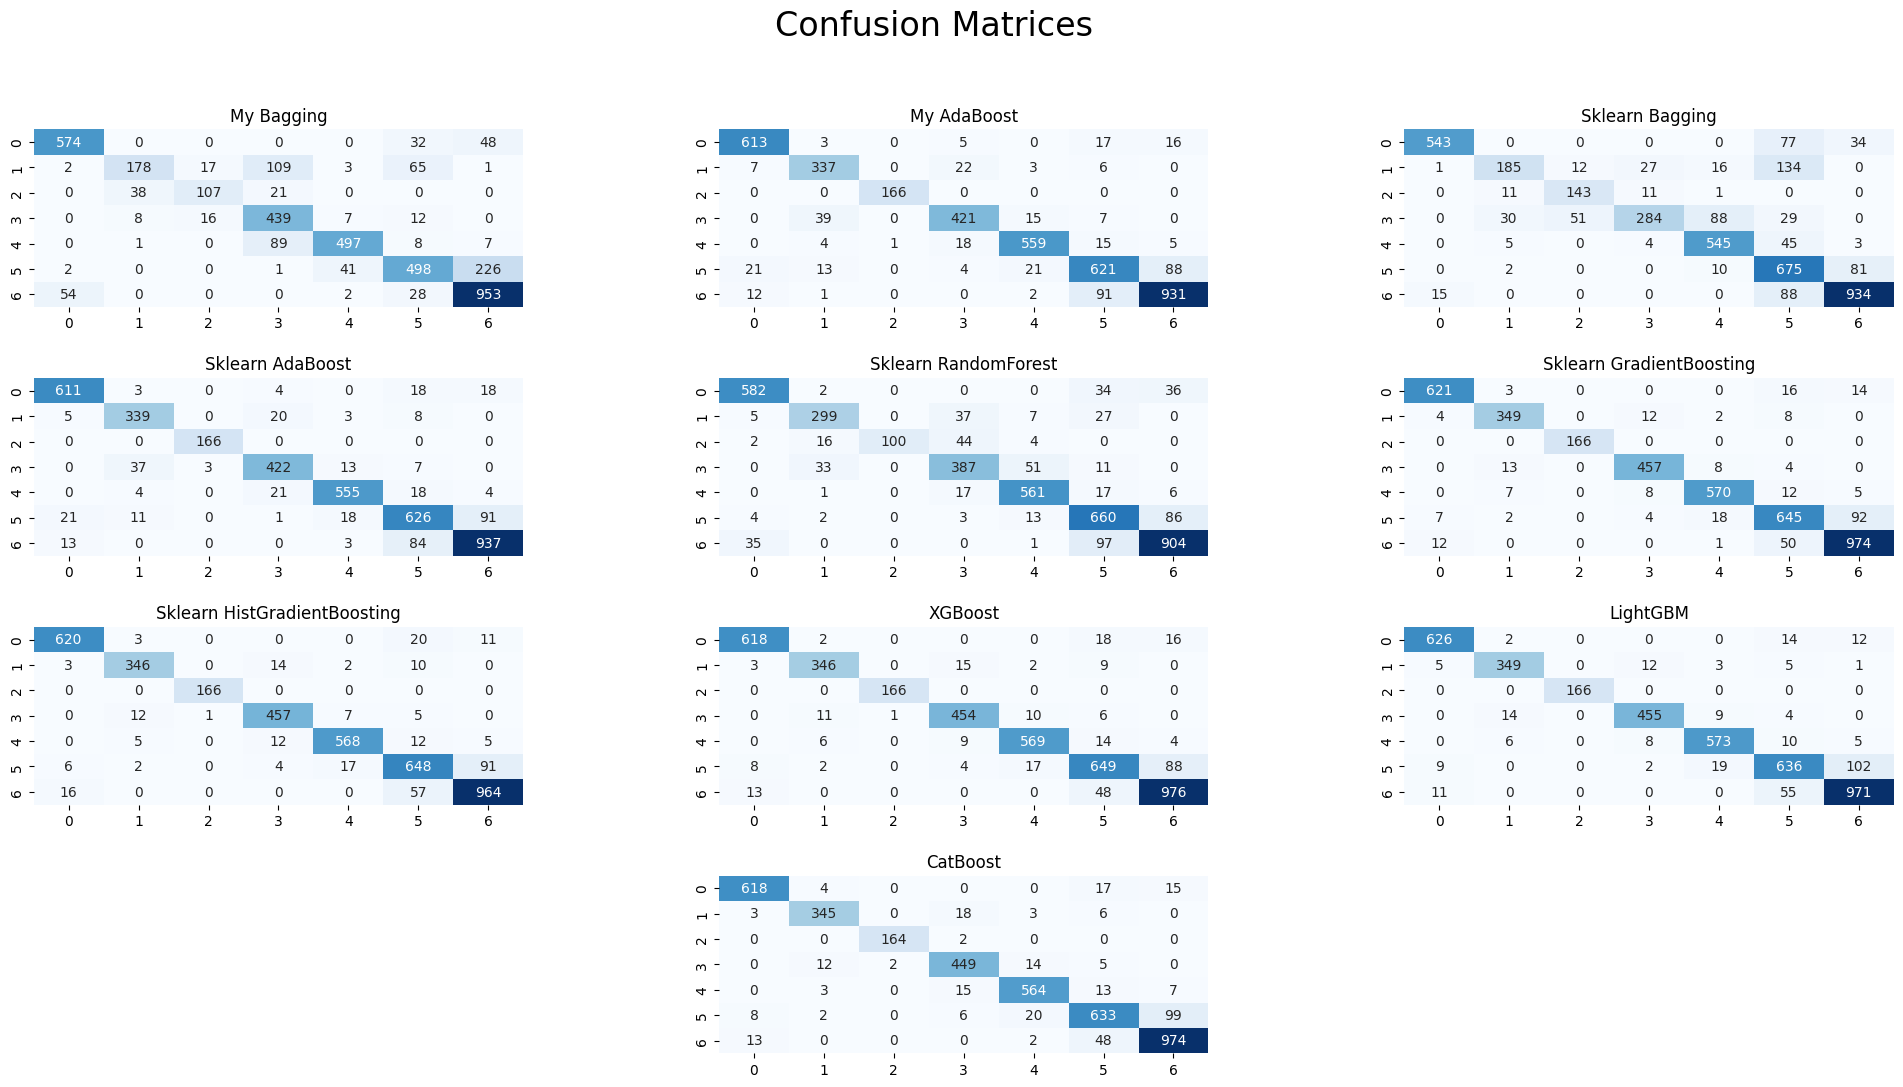

In [44]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(4, 3, 1)
plt.title("My Bagging")
sns.heatmap(confusion_matrix(y_test, y_BaggingCalculator), cmap='Blues', annot = True, fmt = 'd', cbar=False)

plt.subplot(4, 3, 2)
plt.title("My AdaBoost")
sns.heatmap(confusion_matrix(y_test, y_AdaBoostCalculator), cmap='Blues', annot = True, fmt = 'd', cbar=False)

plt.subplot(4, 3, 3)
plt.title("Sklearn Bagging")
sns.heatmap(confusion_matrix(y_test, y_BaggingClassifier), cmap='Blues', annot = True, fmt = 'd', cbar=False)

plt.subplot(4, 3, 4)
plt.title("Sklearn AdaBoost")
sns.heatmap(confusion_matrix(y_test, y_AdaBoostClassifier), cmap = 'Blues', annot = True, fmt = 'd', cbar=False)

plt.subplot(4, 3, 5)
plt.title("Sklearn RandomForest")
sns.heatmap(confusion_matrix(y_test, y_RandomForestClassifier), cmap = 'Blues', annot = True, fmt = 'd', cbar=False)

plt.subplot(4, 3, 6)
plt.title("Sklearn GradientBoosting")
sns.heatmap(confusion_matrix(y_test, y_GradientBoostingClassifier), cmap = 'Blues', annot = True, fmt = 'd', cbar=False)

plt.subplot(4, 3, 7)
plt.title("Sklearn HistGradientBoosting")
sns.heatmap(confusion_matrix(y_test, y_HistGradientBoostingClassifier), cmap = 'Blues', annot = True, fmt = 'd', cbar=False)

plt.subplot(4, 3, 8)
plt.title("XGBoost")
sns.heatmap(confusion_matrix(y_test, y_XGBClassifier), cmap = 'Blues', annot = True, fmt = 'd', cbar=False)

plt.subplot(4, 3, 9)
plt.title("LightGBM")
sns.heatmap(confusion_matrix(y_test, y_LGBMClassifier), cmap = 'Blues', annot = True, fmt = 'd', cbar=False)

plt.subplot(4, 3, 11)
plt.title("CatBoost")
sns.heatmap(confusion_matrix(y_test, y_CatBoostClassifier), cmap = 'Blues', annot = True, fmt = 'd', cbar=False)

plt.show()

Все результаты являются приемлемыми. Единственное, что собственный Bagging чаще путает 6-ой класс с 5-ым и 1-й с 3-им